# ProgrammingAssignment06_clusterAnalysis 

## 1. k-means using scikit-learn
The healthy_lifestyle dataset contains information on lifestyle measures such as amount of sunshine, pollution, and happiness levels for 44 major cities around the world. Apply k-means clustering to the cities' number of hours of sunshine and happiness levels.

- Import the needed packages for clustering.
- Initialize and fit a k-means clustering model using sklearn's Kmeans() function.
- Use the user-defined number of clusters, init='random', n_init=10, random_state=123, and algorithm='elkan'.
- Find the cluster centroids and inertia.

Ex: If the input is: 4

the output should be:

- Centroids: [[ 0.8294  0.2562]
 [ 1.3106 -1.887 ]
 [-0.9471  0.8281]
 [-0.6372 -0.7943]]
- Inertia: 16.4991

In [2]:
# Import needed packages
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load the healthy lifestyle dataset
healthy = pd.read_csv('healthy_lifestyle.csv')

# Input the number of clusters
number = int(input("Enter the number of clusters: "))

# Define input features
X = healthy[['sunshine_hours', 'happiness_levels']]

# Use StandardScaler() to standardize input features
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=['sunshine_hours', 'happiness_levels'])
X = X.dropna()

# Initialize a k-means clustering algorithm with the specified parameters
kmeans = KMeans(n_clusters=number, init='random', n_init=10, random_state=123, algorithm='elkan')

# Fit the algorithm to the input features
kmeans.fit(X)

# Find and print the cluster centroids
centroids = kmeans.cluster_centers_
print("Centroids:", np.round(centroids, 4))

# Find and print the cluster inertia
inertia = kmeans.inertia_
print("Inertia:", np.round(inertia, 4))

Enter the number of clusters:  4


Centroids: [[-0.9471  0.8281]
 [ 0.8294  0.2562]
 [ 1.3106 -1.887 ]
 [-0.6372 -0.7943]]
Inertia: 16.4991


## 2. Hierarchical clustering using scikit-learn
The healthy_lifestyle dataset contains information on lifestyle measures such as amount of sunshine, pollution, and happiness levels for 44 major cities around the world. Apply agglomerative clustering to the cities' number of hours of sunshine and happiness levels using both sklearn and SciPy.

- Import the needed packages for agglomerative clustering from sklearn and SciPy.
- Initialize and fit an agglomerative clustering model using sklearn's AgglomerativeClustering() function. Use the user-defined number of clusters and ward linkage.
- Add cluster labels to the input feature dataframe.
- Calculate the distances between all instances using SciPy's pdist() function.
- Convert the distance matrix to a square matrix using SciPy's squareform() function.
- Define a clustering model with ward linkage using SciPy's linkage() function.

Ex: If the input is: 4

the output should be:
|       | sunshine_hours | happiness_levels | labels |
|-------|----------------|------------------|--------|
| 0     | -0.691660      | 1.025642         | 3      |
| 1     | 0.695725       | 0.801124         | 0      |
| 2     | -0.645295      | 0.872562         | 3      |
| 3     | -0.757641      | 0.933794         | 3      |
| 4     | -1.098246      | 1.229750         | 3      |


First five rows of the linkage matrix from SciPy:
    
 - [[39. 40.  0.  2.]
 [28. 43.  0.  3.]
 [ 7. 18.  0.  2.]
 [ 8. 42.  0.  2.]
 [ 0.  3.  0.  2.]]

In [3]:
# Import needed packages
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage

# Load the healthy lifestyle dataset
healthy = pd.read_csv('healthy_lifestyle.csv')

# Input the number of clusters
number = int(input("Enter the number of clusters: "))

# Define input features
X = healthy[['sunshine_hours', 'happiness_levels']]

# Use StandardScaler() to standardize input features
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=['sunshine_hours', 'happiness_levels'])
X = X.dropna()

# Initialize and fit an agglomerative clustering model using ward linkage
agglo_clustering = AgglomerativeClustering(n_clusters=number, linkage='ward')
X['labels'] = agglo_clustering.fit_predict(X)

# Display the labeled dataframe (first few rows)
print(X.head())

# Perform agglomerative clustering using SciPy
# Calculate the distances between all instances
dist_matrix = pdist(X[['sunshine_hours', 'happiness_levels']], metric='euclidean')

# Convert the distance matrix to a square matrix
dist_square_matrix = squareform(dist_matrix)

# Define a clustering model with ward linkage using SciPy's linkage function
clusters_scipy = linkage(dist_matrix, method='ward')

# Display the first five rows of the linkage matrix from SciPy
print("First five rows of the linkage matrix from SciPy:\n", np.round(clusters_scipy[:5, :], 4))

Enter the number of clusters:  4


   sunshine_hours  happiness_levels  labels
0       -0.691660          1.025642       3
1        0.695725          0.801124       0
2       -0.645295          0.872562       3
3       -0.757641          0.933794       3
4       -1.098246          1.229750       3
First five rows of the linkage matrix from SciPy:
 [[3.900e+01 4.000e+01 1.250e-02 2.000e+00]
 [2.800e+01 4.300e+01 4.840e-02 3.000e+00]
 [7.000e+00 1.800e+01 6.420e-02 2.000e+00]
 [8.000e+00 4.200e+01 8.870e-02 2.000e+00]
 [3.600e+01 4.500e+01 1.084e-01 3.000e+00]]


## 3. DBSCAN using scikit-learn
- Increase the **number of points sampled to 500**.
- Apply the DBSCAN model with **epsilon=1** and **min_samples=8** to identify the number of core-points and outliers (or noise). 
- EX: if the epsilon=1 and min_samples = 10 and number of points sampled to 100.
  - the number of core-points = 85
  - the number of outliers    = 11

Core points: 498
Number of core points: 1


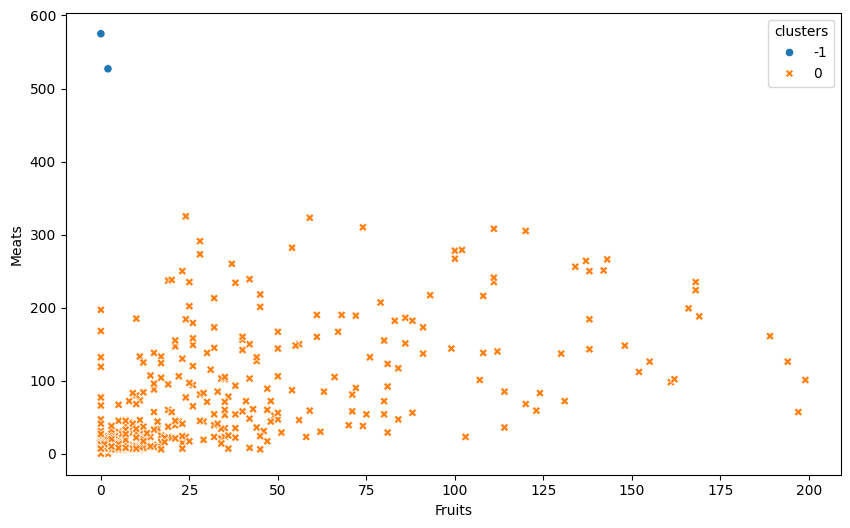

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# Load the customer personality dataset and take a random sample of 500 instances
data = pd.read_csv('customer_personality.csv').sample(500, random_state=123)

# Use StandardScaler() to standardize input features
X = data[['Fruits', 'Meats']]
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=['Fruits', 'Meats'])

# Apply DBSCAN with epsilon=1 and min_samples=8
dbscan = DBSCAN(eps=1, min_samples=8)
dbscan = dbscan.fit(X)

# Print the cluster labels and core point indices
data['labels'] = dbscan.labels_
core_points = np.sum(dbscan.labels_ != -1)
num_core_points = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)

print("Core points:", core_points)
print("Number of core points:", num_core_points)

# Add the cluster labels to the dataset as strings
data['clusters'] = dbscan.labels_.astype(str)

# Sort by cluster label (for plotting purposes)
data.sort_values(by='clusters', inplace=True)

# Plot clusters on the original data
plt.figure(figsize=(10, 6))
p = sns.scatterplot(data=data, x='Fruits', y='Meats', hue='clusters', style='clusters')
plt.show()
